In [1]:
import db_logger
import matplotlib.pyplot as plt
import glob, pathlib
import ipywidgets as widgets
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:

logger =  db_logger.DB_Logger("/mnt/data/arty/data/gan_sampling/baseline.db", connect_only=True)
name2id = {}
for id in logger.get_experiment_ids():
    name = logger.get_experiment_name(id)
    name2id[name] = id
    print(name) 
    # if "OrganCMNIST" in name and "aug_True" in name:
    #     logger.remove_experiment(id)

Connecting to existing database at /mnt/data/arty/data/gan_sampling/baseline.db
BloodMNIST_rlvl1_blvl0_alvl0
BloodMNIST_rlvl1_blvl1_alvl0
OrganCMNIST_rlvl1_blvl0_alvl0
OrganCMNIST_rlvl1_blvl1_alvl0
PathMNIST_rlvl1_blvl0_alvl0
PathMNIST_rlvl1_blvl1_alvl0
BloodMNIST_rlvl2_blvl0_alvl0
BloodMNIST_rlvl2_blvl1_alvl0
PathMNIST_rlvl2_blvl0_alvl0
OrganCMNIST_rlvl2_blvl0_alvl0
PathMNIST_rlvl2_blvl1_alvl0
OrganCMNIST_rlvl2_blvl1_alvl0
BloodMNIST_rlvl3_blvl0_alvl0
BloodMNIST_rlvl3_blvl1_alvl0
PathMNIST_rlvl3_blvl0_alvl0
OrganCMNIST_rlvl3_blvl0_alvl0
PathMNIST_rlvl3_blvl1_alvl0
OrganCMNIST_rlvl3_blvl1_alvl0
BloodMNIST_rlvl0_blvl0_alvl0
BloodMNIST_rlvl0_blvl1_alvl0
PathMNIST_rlvl0_blvl0_alvl0
PathMNIST_rlvl0_blvl1_alvl0
OrganCMNIST_rlvl0_blvl0_alvl0
BloodMNIST_rlvl1_blvl0_alvl1
BloodMNIST_rlvl1_blvl1_alvl1
PathMNIST_rlvl1_blvl0_alvl1
OrganCMNIST_rlvl0_blvl1_alvl0
OrganCMNIST_rlvl1_blvl0_alvl1
OrganCMNIST_rlvl1_blvl1_alvl1
PathMNIST_rlvl1_blvl1_alvl1
BloodMNIST_rlvl2_blvl0_alvl1
BloodMNIST_rlvl2_blvl

In [31]:
results = {}
from collections import defaultdict
# Your data (accuracy, std, rlvl, b, aug)
data = defaultdict(list)
for exp in logger.get_experiment_ids():
    imgs, means, stds, maxs, samples = logger.get_stats(exp)
    if len(means) == 0:
        continue
    max_mean_idx = means.index(max(means))
    max_mean = means[max_mean_idx]
    max_std = stds[max_mean_idx]
    at_img = imgs[max_mean_idx]
    samples = samples[max_mean_idx]
    name = logger.get_experiment_name(exp)
    results[f"{name:<35} at: {at_img//1000:>6}k, samples: {samples:<3}"] = max_mean
    name, rlvl, blvl, alvl = name.split("_")
    rlvl = int(rlvl[-1])
    alvl = int(alvl[-1])
    blvl = int(blvl[-1])

    data[name].append((max_mean.item(),max_std.item(), rlvl, blvl, alvl))
    


In [32]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
filterfunc = lambda x: "O" in x[0] 
sorted_results = list(filter(filterfunc, sorted_results))
for k, v in sorted_results[:40]:
    print(f"{v:.4f} -> {k}")

0.8731 -> OrganCMNIST_rlvl0_blvl0_alvl0       at:    100k, samples: 1  
0.8635 -> OrganCMNIST_rlvl1_blvl0_alvl0       at:     90k, samples: 1  
0.8446 -> OrganCMNIST_rlvl1_blvl1_alvl0       at:    100k, samples: 2  
0.8237 -> OrganCMNIST_rlvl0_blvl1_alvl0       at:    100k, samples: 1  
0.7931 -> OrganCMNIST_rlvl1_blvl1_alvl3       at:     10k, samples: 6  
0.7771 -> OrganCMNIST_rlvl0_blvl1_alvl3       at:     10k, samples: 6  
0.7746 -> OrganCMNIST_rlvl3_blvl1_alvl2       at:     10k, samples: 6  
0.7739 -> OrganCMNIST_rlvl0_blvl1_alvl2       at:     10k, samples: 6  
0.7712 -> OrganCMNIST_rlvl1_blvl1_alvl2       at:     10k, samples: 6  
0.7646 -> OrganCMNIST_rlvl0_blvl0_alvl2       at:     10k, samples: 6  
0.7606 -> OrganCMNIST_rlvl1_blvl0_alvl2       at:     10k, samples: 6  
0.7468 -> OrganCMNIST_rlvl0_blvl0_alvl3       at:     10k, samples: 6  
0.7446 -> OrganCMNIST_rlvl3_blvl0_alvl0       at:     70k, samples: 1  
0.7399 -> OrganCMNIST_rlvl2_blvl1_alvl0       at:     10k, sampl

In [14]:
for d in data.items():
    print(d)

('BloodMNIST', [(0.5737895645573104, 0.11488739050965827, 1, 0, 0), (0.6247920073083172, 0.0308796697332826, 1, 1, 0), (0.6453300924818238, 0.04664864051222767, 2, 0, 0), (0.49554616340527946, 0.14285975275776058, 2, 1, 0), (0.39176551294790724, 0.03756269178246319, 3, 0, 0), (0.611603251014089, 0.03889725082825646, 3, 1, 0), (0.7573347274622027, 0.08551169213015158, 0, 0, 0), (0.7254684415931467, 0.08613454616350263, 0, 1, 0), (0.5932732791617389, 0.017494901076437752, 1, 0, 1), (0.5559553950645811, 0.012590272576314954, 1, 1, 1), (0.42036520945879996, 0.0, 2, 0, 1), (0.7312613350262334, 0.0, 2, 1, 1), (0.413974911103012, 0.0, 3, 0, 1), (0.7812327193988898, 0.0, 3, 1, 1), (0.5455480333985099, 0.0, 0, 0, 1), (0.5877608832975971, 0.0, 2, 0, 2), (0.4189643495215725, 0.0, 2, 1, 2), (0.337473662856702, 0.0, 3, 0, 2), (0.5300646552088515, 0.0, 3, 1, 2), (0.778790940951334, 0.0, 0, 0, 2), (0.7942821947326476, 0.0, 0, 1, 2), (0.48250419659316024, 0.0, 1, 0, 3), (0.7085962886199788, 0.0, 1, 1,

interactive(children=(Dropdown(description='exp1', options=('BloodMNIST_rlvl0_blvl0_alvl0', 'BloodMNIST_rlvl0_…

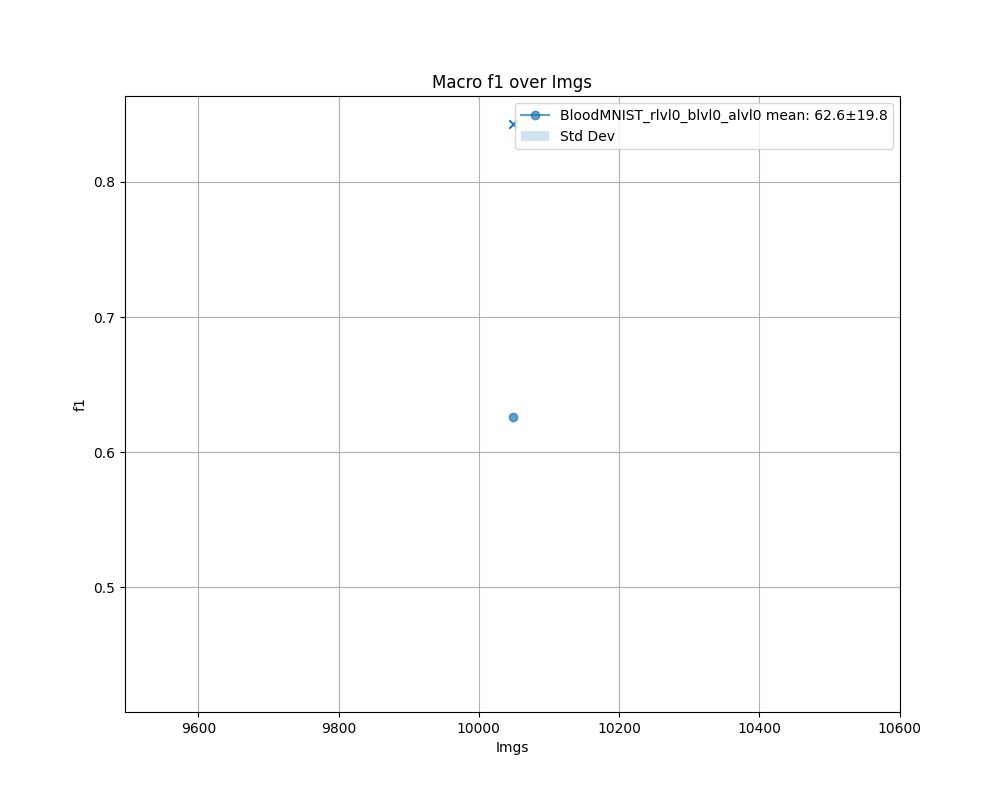

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
names = sorted([logger.get_experiment_name(x) for x in logger.get_experiment_ids()],)
@widgets.interact(
        exp1=names, 
        exp2=["none"]+names, 
        exp3=["none"]+names,
        exp4=["none"]+names,
        exp5=["none"]+names,
        metric=["f1", "acc", "precision", "recall"])
def display_content(exp1, exp2, exp3, exp4, exp5, metric):
    name2id = {}
    for id in logger.get_experiment_ids():
        name2id[logger.get_experiment_name(id)] = id
    print(f"Working ...", end="")
    ax.clear()
    db_logger.plot_metric(logger, [name2id[exp1]], metric=metric, ax=ax, prefix='')
    if exp2 != "none":
        db_logger.plot_metric(logger, [name2id[exp2]], metric=metric, ax=ax, prefix='')
    if exp3 != "none":
        db_logger.plot_metric(logger, [name2id[exp3]], metric=metric, ax=ax, prefix='')
    if exp4 != "none":
        db_logger.plot_metric(logger, [name2id[exp4]], metric=metric, ax=ax, prefix='')
    if exp5 != "none":
        db_logger.plot_metric(logger, [name2id[exp5]], metric=metric, ax=ax, prefix='')
    print(f"\rDone       ")

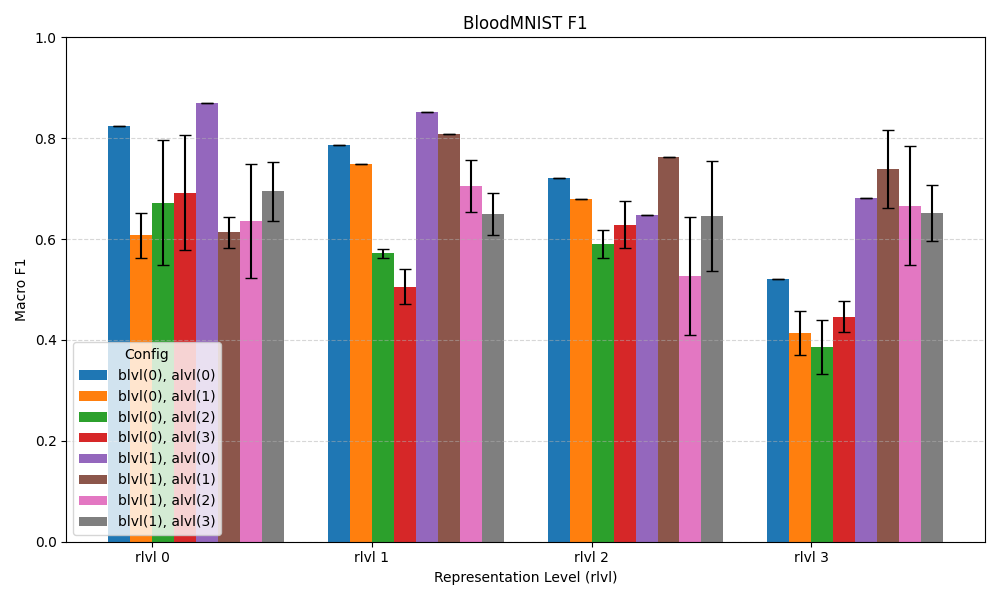

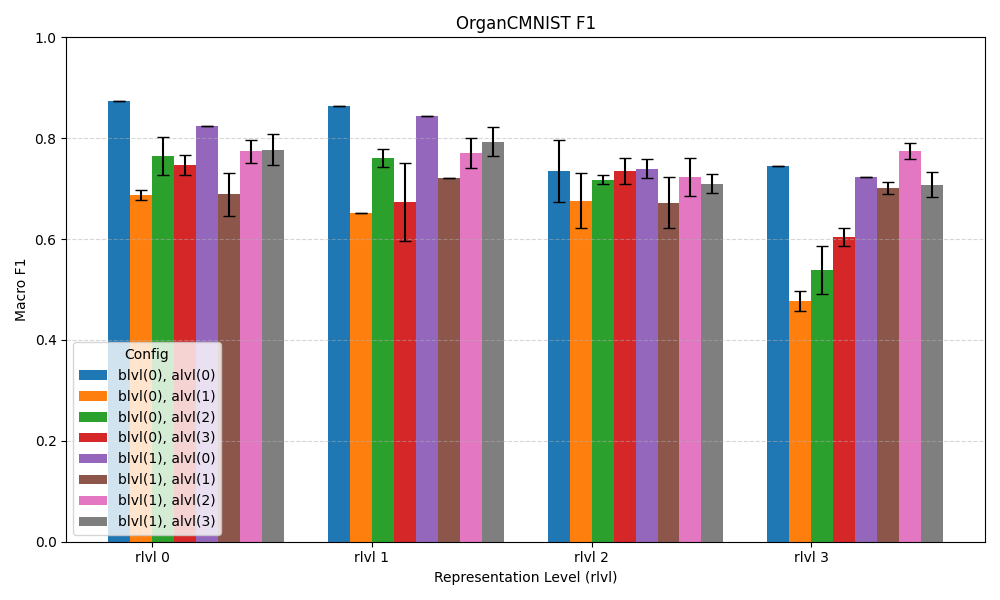

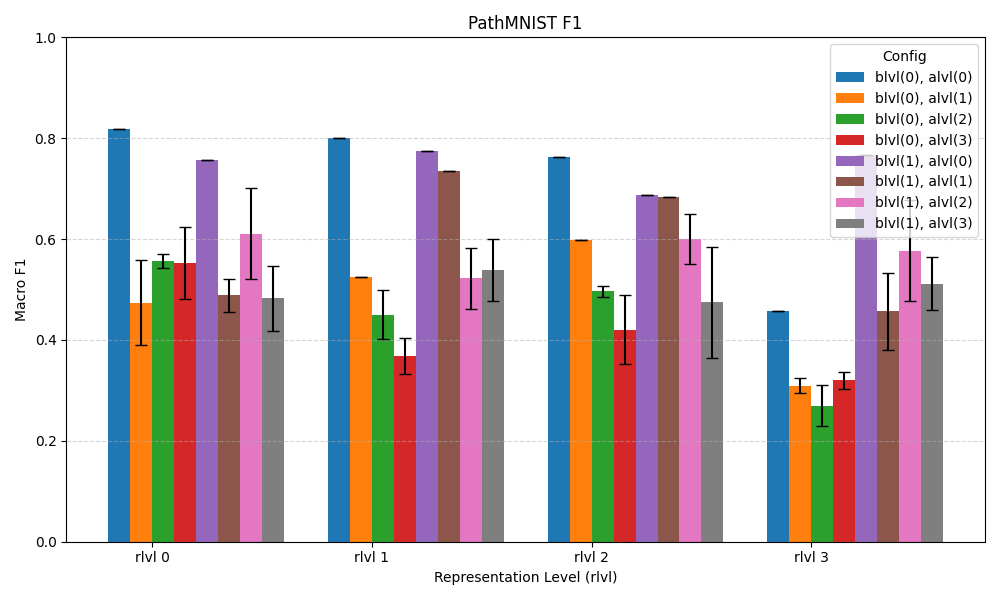

In [33]:
config_labels = {
    (0, 0): "blvl(0), alvl(0)",
    (0, 1): "blvl(0), alvl(1)",
    (0, 2): "blvl(0), alvl(2)",
    (0, 3): "blvl(0), alvl(3)",
    (1, 0): "blvl(1), alvl(0)",
    (1, 1): "blvl(1), alvl(1)",
    (1, 2): "blvl(1), alvl(2)",
    (1, 3): "blvl(1), alvl(3)",
}

# Organize data
means_by_group = {rlvl: {cfg: None for cfg in config_labels} for rlvl in range(4)}
stds_by_group = {rlvl: {cfg: 0.0 for cfg in config_labels} for rlvl in range(4)}
# Mapping config combinations to label
for name, d in data.items():

    for acc, std, rlvl, blvl, alvl in d:
        key = (blvl, alvl)
        means_by_group[rlvl][key] = acc
        stds_by_group[rlvl][key] = std

    # Bar plot setup
    x = np.arange(4)  # rlvl 0,1,2,3
    width = 0.1

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, config in enumerate(config_labels):
        means = [means_by_group[rlvl][config] for rlvl in x]
        stds = [stds_by_group[rlvl][config] for rlvl in x]
        offsets = x + (i - 1.5) * width
        ax.bar(offsets, means, width, yerr=stds, capsize=4, label=config_labels[config])

    # Aesthetics
    ax.set_ylabel('Macro F1')
    ax.set_xlabel('Representation Level (rlvl)')
    ax.set_title(f'{name} F1')
    ax.set_xticks(x)
    ax.set_xticklabels([f'rlvl {i}' for i in x])
    ax.set_ylim(0, 1.0)
    ax.legend(title="Config")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(f"{name}_bar.png")